In [1]:
from samalg import SAM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context
import scvelo as scv

In [2]:
#import files
dmel=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/analysis_6/s_fca_biohub_ovary_10x.h5ad", chunk_size=6000)
#dmel_r=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/8.Jupyter_notebooks_for_submission/r_fca_biohub_ovary_10x.h5ad", chunk_size=6000)
velo_out_dmel = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/32.reanalyze_drosophila_data/analysis/dmel_1/velocyto/dmel_1.loom', cache=True)

In [3]:
order=["unannotated","ovarian sheath muscle","follicle stem cell and prefollicle cell","main body follicle cell ca. until St. 5","central main body follicle cell ca. St. 6-8","choriogenic main body follicle cell St. 12","choriogenic main body follicle cell and corpus luteum","posterior terminal follicle cell ca. St. 5-8","stretch follicle cell","dorsal appendage forming follicle cell","choriogenic main body follicle cell St. 14","polar follicle cell","stalk follicle cell","adult tracheal cell","escort cell","oviduct","16-cell germline cyst in germarium region 2a and 2b","post-mitotic germ cell early 16-cell cyst","post-mitotic endocycling nurse cell","young germ cell","germ cell stage 4 and later","germline cell, unknown stage","artefact"]
dmel.obs['annotation'] = dmel.obs['annotation'].cat.reorder_categories(order)

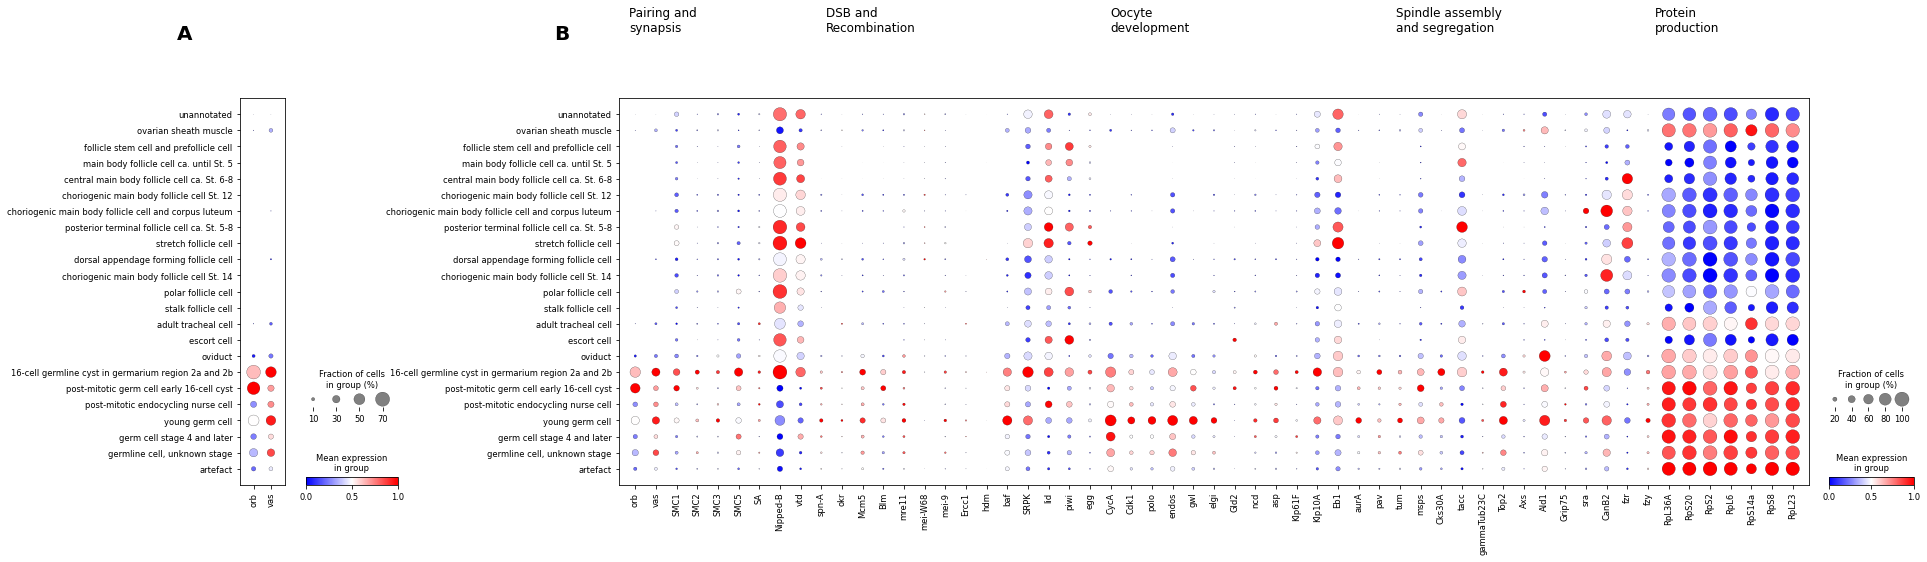

In [54]:
#with rc_context({'figure.figsize': (10, 4)}):
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
pl.figure(figsize=(30, 8))
gs = gridspec.GridSpec(1, 9)
ax0 = pl.subplot(gs[0, 0])
dmel_marker_2=['orb','vas']
sc.pl.dotplot(dmel,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var',ax=ax0)
ax0.text(-0.4, 1.06, 'A',fontsize=20, fontweight='bold', va='top')
ax1 = pl.subplot(gs[:, 2:])
dmel_marker_2=['orb','vas','SMC1', 'SMC2','SMC3','SMC5','SA','Nipped-B','vtd','spn-A', 'okr','Mcm5','Blm','mre11','mei-W68','mei-9','Ercc1','hdm','baf', 'SRPK','lid','piwi','egg','CycA','Cdk1','polo','endos','gwl','elgi','Gld2','ncd','asp','Klp61F','Klp10A','Eb1','aurA','pav','tum','msps','Cks30A','tacc','gammaTub23C','Top2','Axs','Ald1','Grip75','sra','CanB2','fzr','fzy','RpL36A','RpS20','RpS2','RpL6','RpS14a','RpS8','RpL23']
sc.pl.dotplot(dmel,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var',ax=ax1)
ax1.text(-0.05, 1.06, 'B',fontsize=20, fontweight='bold', va='top')
ax1.text(0.008, 1.1, 'Pairing and\nsynapsis',fontsize=12, va='top')#fontweight='bold',
ax1.text(0.16, 1.1, 'DSB and\nRecombination',fontsize=12, va='top')
ax1.text(0.38, 1.1, 'Oocyte\ndevelopment',fontsize=12, va='top')
ax1.text(0.60, 1.1, 'Spindle assembly\nand segregation',fontsize=12, va='top')
ax1.text(0.8, 1.1, 'Protein\nproduction',fontsize=12, va='top')
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila_v1.pdf',bbox_inches='tight',facecolor='white', edgecolor='white')

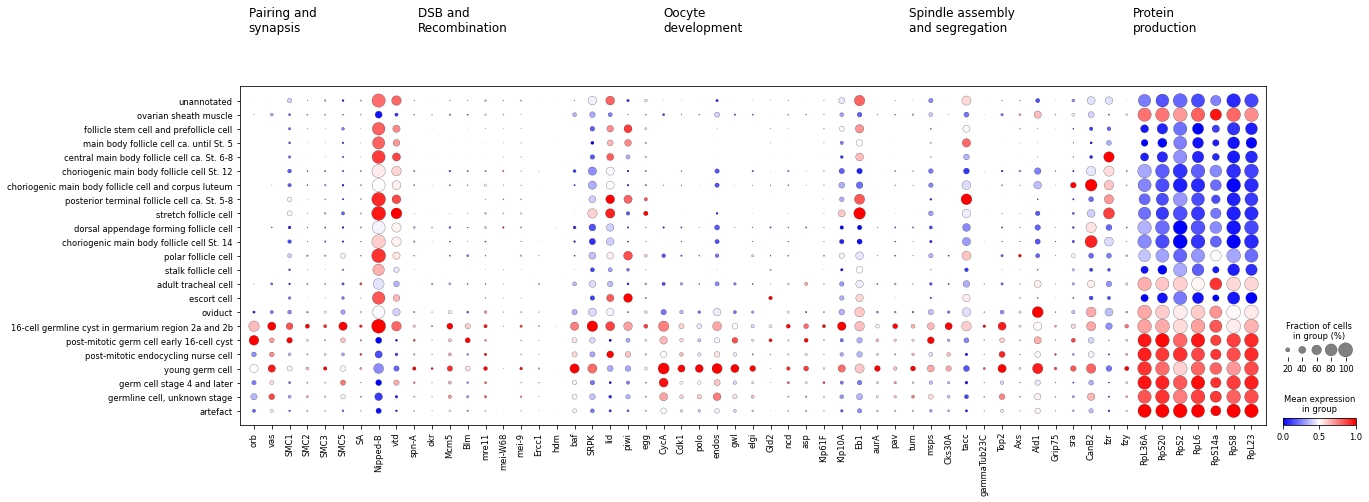

In [60]:
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
pl.figure(figsize=(20, 7))
gs = gridspec.GridSpec(1, 1)
ax1 = pl.subplot(gs[0, 0])
dmel_marker_2=['orb','vas','SMC1', 'SMC2','SMC3','SMC5','SA','Nipped-B','vtd','spn-A', 'okr','Mcm5','Blm','mre11','mei-W68','mei-9','Ercc1','hdm','baf', 'SRPK','lid','piwi','egg','CycA','Cdk1','polo','endos','gwl','elgi','Gld2','ncd','asp','Klp61F','Klp10A','Eb1','aurA','pav','tum','msps','Cks30A','tacc','gammaTub23C','Top2','Axs','Ald1','Grip75','sra','CanB2','fzr','fzy','RpL36A','RpS20','RpS2','RpL6','RpS14a','RpS8','RpL23']
sc.pl.dotplot(dmel,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var',ax=ax1)
#ax1.text(-0.05, 1.06, 'B',fontsize=20, fontweight='bold', va='top')
ax1.text(0.008, 1.1, 'Pairing and\nsynapsis',fontsize=12, va='top')#fontweight='bold',
ax1.text(0.16, 1.1, 'DSB and\nRecombination',fontsize=12, va='top')
ax1.text(0.38, 1.1, 'Oocyte\ndevelopment',fontsize=12, va='top')
ax1.text(0.60, 1.1, 'Spindle assembly\nand segregation',fontsize=12, va='top')
ax1.text(0.8, 1.1, 'Protein\nproduction',fontsize=12, va='top')
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila_v2.pdf',bbox_inches='tight',facecolor='white', edgecolor='white')

In [21]:
#formatting
barcodes = [bc.split(':')[1] for bc in velo_out_dmel.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '-1' for bc in barcodes]
velo_out_dmel.obs.index = barcodes
velo_out_dmel.var_names_make_unique()
barcodes_2 = [bc[0:17-1] + '-1' for bc in dmel.obs.index.tolist()]
dmel.obs.index = barcodes_2
dmel.var_names_make_unique()

In [22]:
dmel.obs_names_make_unique()

In [23]:
#merge
merged_adata=scv.utils.merge(dmel, velo_out_dmel)

In [24]:
merged_adata.obs['annotation'][0:20000].drop_duplicates().to_list()

['unannotated',
 'posterior terminal follicle cell ca. St. 5-8',
 'main body follicle cell ca. until St. 5',
 'choriogenic main body follicle cell St. 12',
 'germ cell stage 4 and later',
 'choriogenic main body follicle cell and corpus luteum',
 'oviduct',
 'young germ cell',
 'adult tracheal cell',
 'stretch follicle cell',
 'choriogenic main body follicle cell St. 14',
 'central main body follicle cell ca. St. 6-8',
 'artefact',
 '16-cell germline cyst in germarium region 2a and 2b',
 'follicle stem cell and prefollicle cell',
 'post-mitotic endocycling nurse cell',
 'ovarian sheath muscle',
 'dorsal appendage forming follicle cell',
 'escort cell',
 'post-mitotic germ cell early 16-cell cyst',
 'polar follicle cell',
 'stalk follicle cell',
 'germline cell, unknown stage']

In [35]:
order=["unannotated","ovarian sheath muscle","follicle stem cell and prefollicle cell","main body follicle cell ca. until St. 5","central main body follicle cell ca. St. 6-8","choriogenic main body follicle cell St. 12","choriogenic main body follicle cell and corpus luteum","posterior terminal follicle cell ca. St. 5-8","stretch follicle cell","dorsal appendage forming follicle cell","choriogenic main body follicle cell St. 14","polar follicle cell","stalk follicle cell","adult tracheal cell","escort cell","oviduct","16-cell germline cyst in germarium region 2a and 2b","post-mitotic germ cell early 16-cell cyst","post-mitotic endocycling nurse cell","young germ cell","germ cell stage 4 and later","germline cell, unknown stage","artefact"]

In [36]:
merged_adata.obs['annotation'] = merged_adata.obs['annotation'].cat.reorder_categories(order)
dmel.obs['annotation'] = dmel.obs['annotation'].cat.reorder_categories(order)
#dmel_r.obs['annotation'] = dmel_r.obs['annotation'].cat.reorder_categories(order)

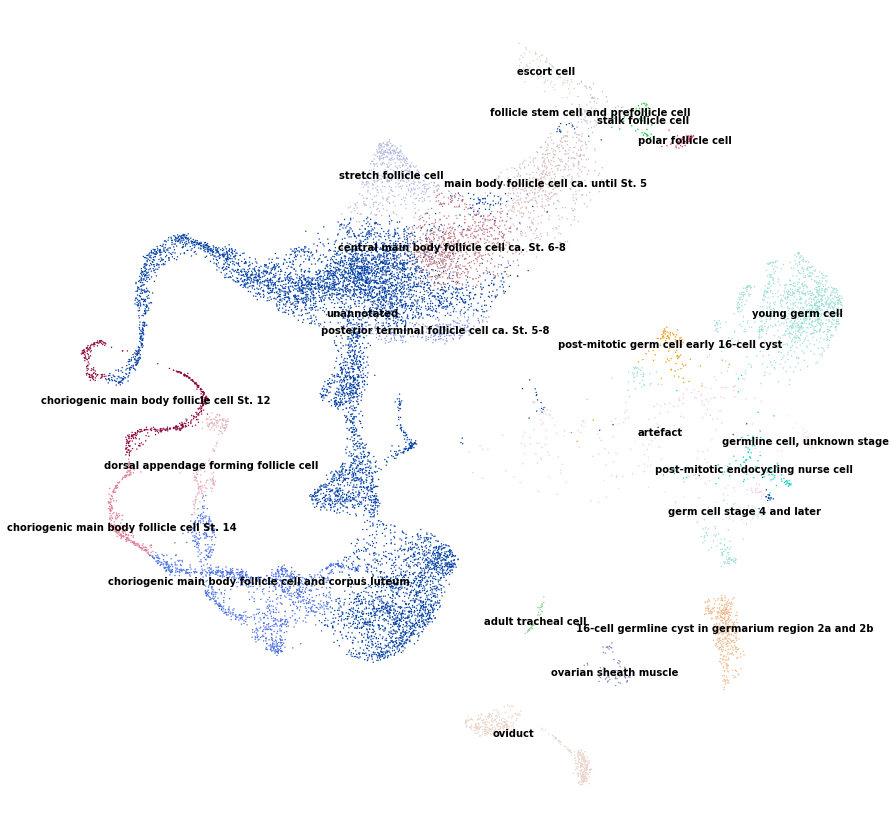

In [27]:
with rc_context({'figure.figsize': (15, 15)}):
    sc.pl.umap(merged_adata, color='annotation', frameon=False, legend_loc='on data', title='')

[<AxesSubplot:>, <AxesSubplot:xlabel='proportions', ylabel='annotation'>]

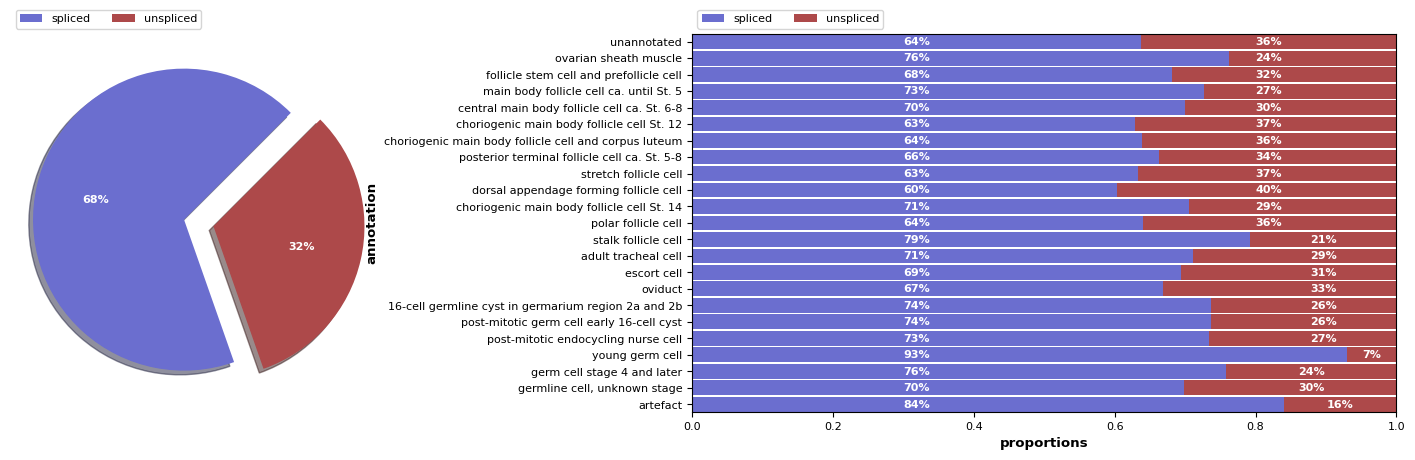

In [12]:
#scv.set_figure_params(figsize=(20,20))
scv.pl.proportions(merged_adata, groupby='annotation',show=False,figsize=(20,5),save='/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/12.drosophila_inactivation/drosophila_splicing.pdf')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/39.paper_figures/rna_velocity_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')

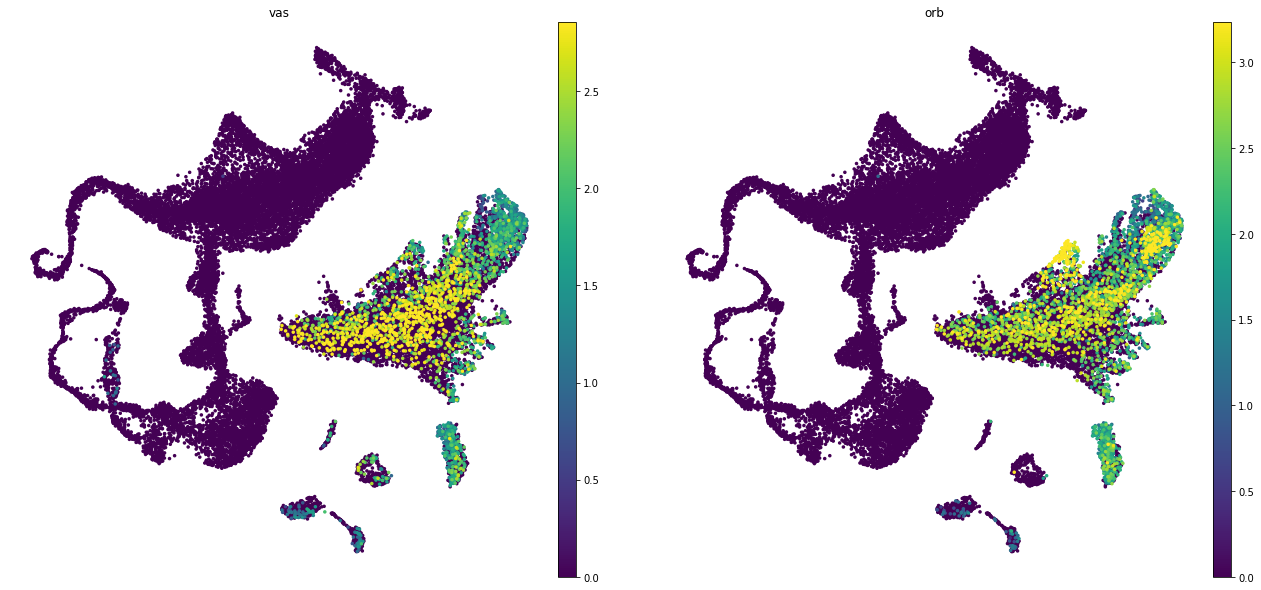

In [28]:
#female germ-line stem cell asymmetric division
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(dmel, color=['vas','orb'], s=50, frameon=False, ncols=4, vmax='p99',show=False)#.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/Beatriz_plots/orb.pdf')
    #plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/lab_meeting_figures/tet.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

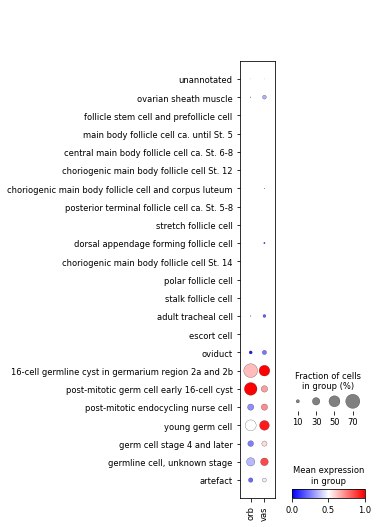

In [47]:
dmel_marker=['orb','vas']
sc.pl.dotplot(dmel,dmel_marker,'annotation',cmap='bwr',show=False,standard_scale='var')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/vasa_orb_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')

In [1]:
#with rc_context({'figure.figsize': (10, 4)}):
dmel_marker_2=['SMC1', 'SMC2','SMC3','SMC5','SA','Nipped-B','vtd','spn-A', 'okr','Mcm5','Blm','mre11','mei-W68','mei-9','Ercc1','hdm','baf', 'SRPK','lid','piwi','egg','CycA','Cdk1','polo','endos','gwl','elgi','Gld2','ncd','asp','Klp61F','Klp10A','Eb1','aurA','pav','tum','msps','Cks30A','tacc','gammaTub23C','Top2','Axs','Ald1','Grip75','sra','CanB2','fzr','fzy','RpL36A','RpS20','RpS2','RpL6','RpS14a','RpS8','RpL23']
sc.pl.dotplot(merged_adata,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')

NameError: name 'sc' is not defined

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

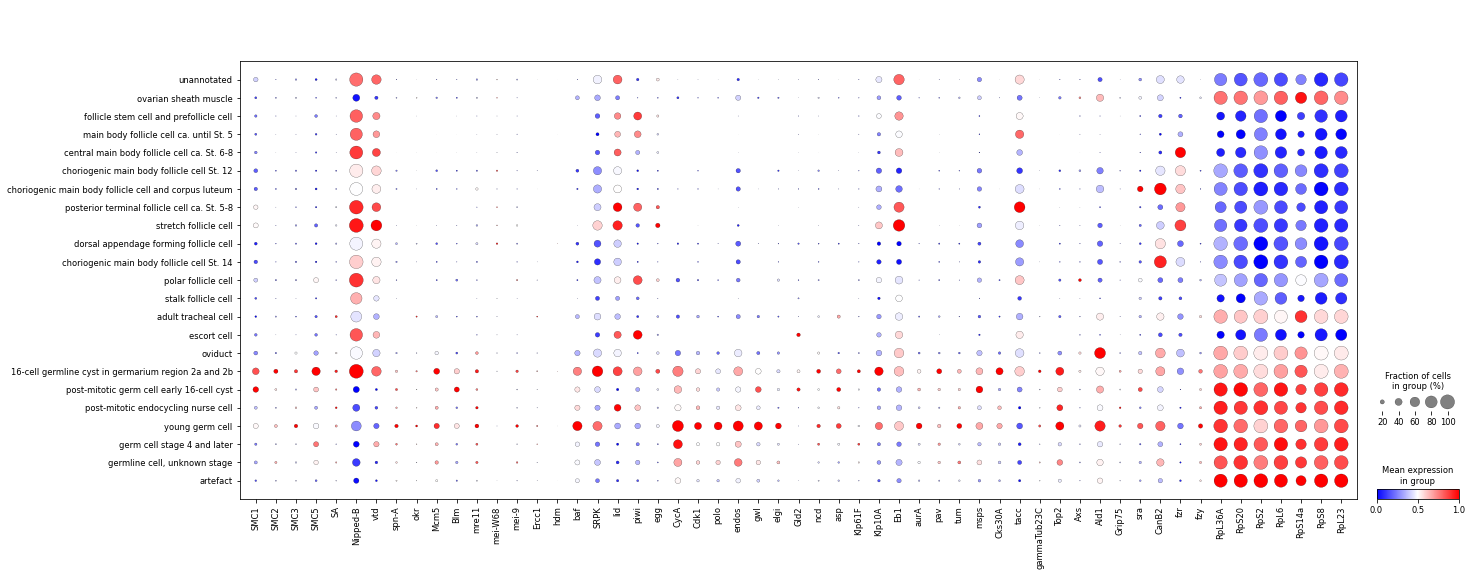

In [42]:
#with rc_context({'figure.figsize': (10, 4)}):
dmel_marker_2=['SMC1', 'SMC2','SMC3','SMC5','SA','Nipped-B','vtd','spn-A', 'okr','Mcm5','Blm','mre11','mei-W68','mei-9','Ercc1','hdm','baf', 'SRPK','lid','piwi','egg','CycA','Cdk1','polo','endos','gwl','elgi','Gld2','ncd','asp','Klp61F','Klp10A','Eb1','aurA','pav','tum','msps','Cks30A','tacc','gammaTub23C','Top2','Axs','Ald1','Grip75','sra','CanB2','fzr','fzy','RpL36A','RpS20','RpS2','RpL6','RpS14a','RpS8','RpL23']
sc.pl.dotplot(dmel,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

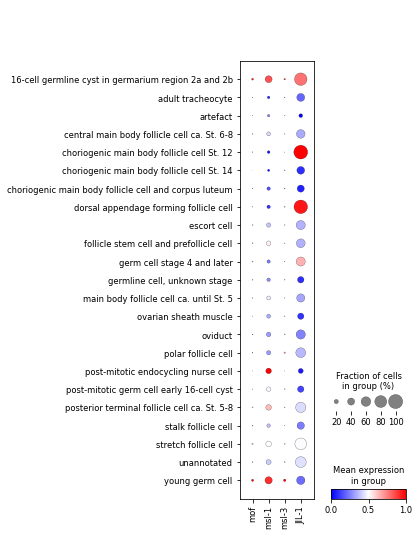

In [14]:
#with rc_context({'figure.figsize': (10, 4)}):
dmel_marker_2=['mof','msl-1','msl-3','JIL-1']
sc.pl.dotplot(dmel_r,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

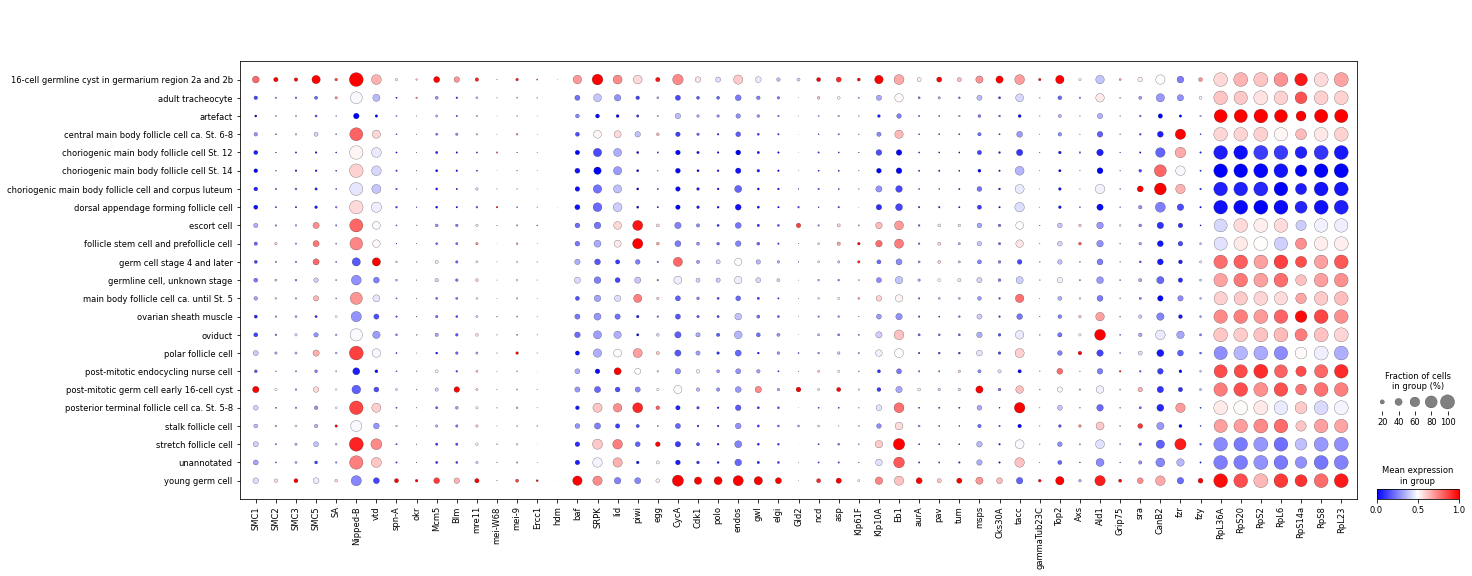

In [45]:
#with rc_context({'figure.figsize': (10, 4)}):
dmel_marker_2=['SMC1', 'SMC2','SMC3','SMC5','SA','Nipped-B','vtd','spn-A', 'okr','Mcm5','Blm','mre11','mei-W68','mei-9','Ercc1','hdm','baf', 'SRPK','lid','piwi','egg','CycA','Cdk1','polo','endos','gwl','elgi','Gld2','ncd','asp','Klp61F','Klp10A','Eb1','aurA','pav','tum','msps','Cks30A','tacc','gammaTub23C','Top2','Axs','Ald1','Grip75','sra','CanB2','fzr','fzy','RpL36A','RpS20','RpS2','RpL6','RpS14a','RpS8','RpL23']
sc.pl.dotplot(dmel_r,dmel_marker_2,'annotation',cmap='bwr',show=False,standard_scale='var')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_drosophila.png',bbox_inches='tight',facecolor='white', edgecolor='white')